In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-5.17091545, -2.39408801],
       [ 2.85761328,  4.97160306],
       [-1.19654485, -0.90337256],
       ...,
       [-3.18100543, -2.33627642],
       [-6.51056525, -1.79742861],
       [-1.76079115,  0.05415759]])

In [4]:
y

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0,
       1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1,
       2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2,
       2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1,
       0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2,

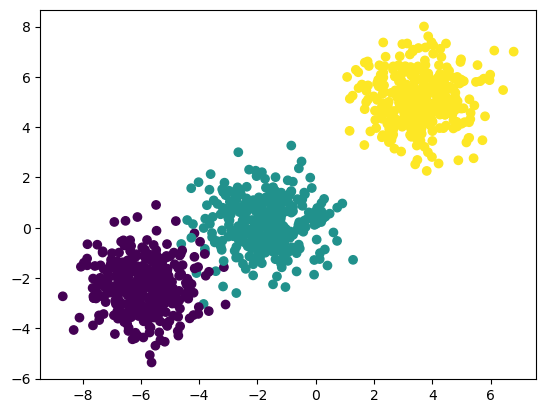

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans


In [14]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1339.9999999999986,
 287.1444669240651,
 103.82669910483489,
 91.92630400160654,
 78.04350656560034,
 63.25766973099932,
 57.1492994449255,
 51.98749318140633,
 46.14092640169238,
 42.612616540745734]

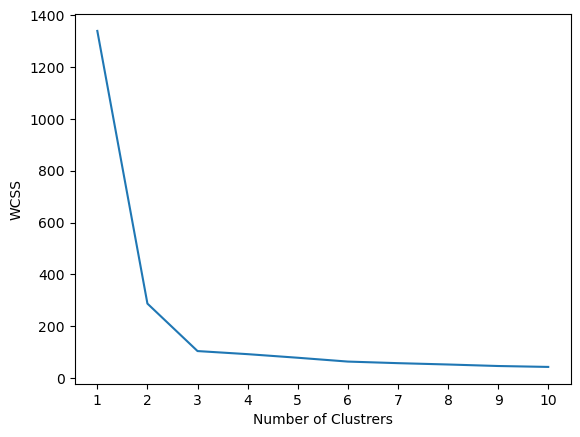

In [16]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [18]:
kmeans.fit_predict(X_train_scaled)


array([0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2,
       1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,

In [19]:
y_pred=kmeans.predict(X_test_scaled)


In [20]:
y_pred

array([2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0,
       2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2,
       1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1,
       0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1,
       1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1,

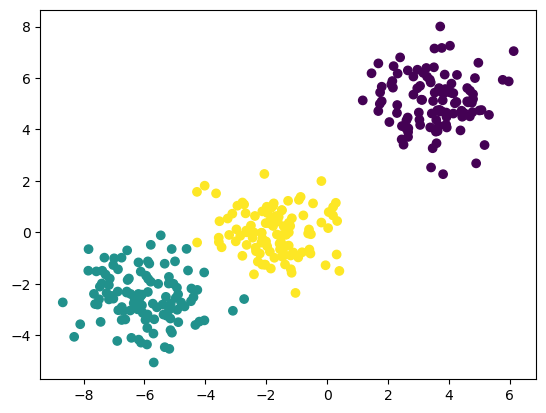

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [23]:
## kneelocator
!pip install kneed

In [24]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")


In [26]:
kl.elbow

3

In [27]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [36]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [32]:
silhouette_coefficients

[0.6882308750006453,
 0.6636883230102273,
 0.5286895726283961,
 0.4184425598817248,
 0.40378729673456626,
 0.34303013569521423,
 0.3398062277338486,
 0.33228437232787905,
 0.3268994670428337]

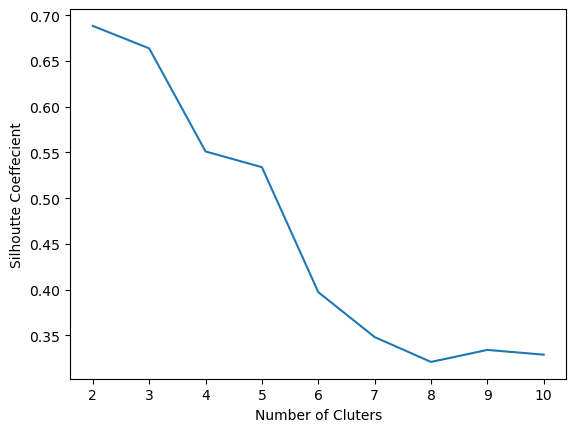

In [37]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()